# Lab 3
Whalessss!!!!!!

## Business Understanding

#### Overview


#### Importance of Data



## Data Preparation



In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
num_images = 1000
img_size = (256, 256)
images = []
base_link = "imgs/w_"
for x in range (0, num_images):
    link = base_link + str(x) + ".jpg"
    img = Image.open(link)
    img = img.convert("L")   #greyscaling
    img = img.resize(img_size)
    images.append(np.array(img))

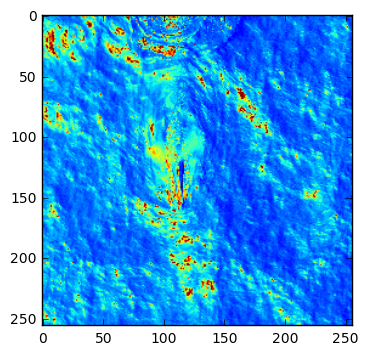

In [10]:
%matplotlib inline
from random import randrange

for x in range(0, 5):
    i = randrange(0, num_images)
    plt.imshow(images[i])


In [11]:
vector_images = []
for x in images:
    vector_images.append(x.reshape((256*256,)))

In [12]:
from sklearn.decomposition import PCA
n_components = 300
pca = PCA(n_components=n_components)
%time pca.fit(vector_images)
eigenfaces = pca.components_.reshape((n_components, img_size[0], img_size[1]))


Wall time: 11.2 s


In [13]:
def plot_explained_variance(pca):    #from eclarson notebook 4
    import plotly
    from plotly.graph_objs import Scatter, Marker, Layout, XAxis, YAxis, Bar, Line
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
      

(256, 256)


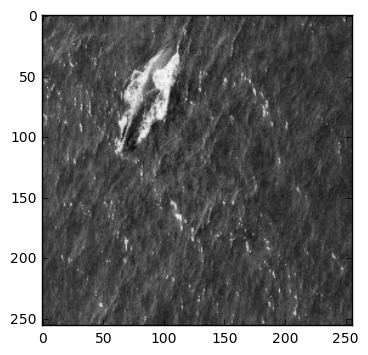

In [14]:
reconstructed_image = pca.inverse_transform(pca.transform(vector_images[5]))
reshaped = reconstructed_image.reshape((256, 256))
print(reshaped.shape)
plt.imshow(reshaped, cmap=plt.cm.gray)
plt.show()
plot_explained_variance(pca)

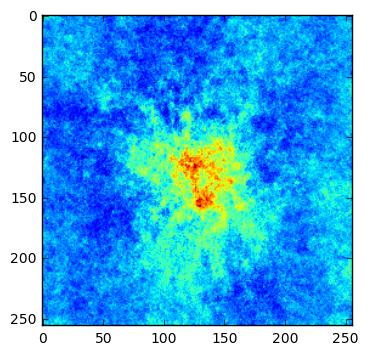

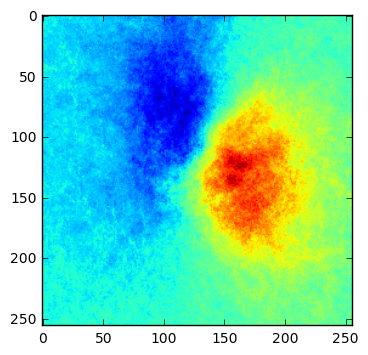

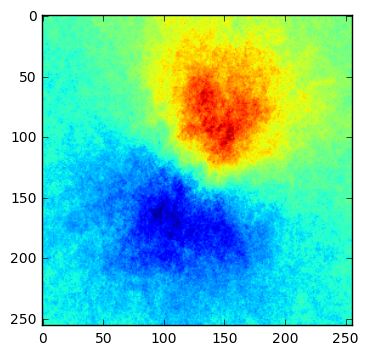

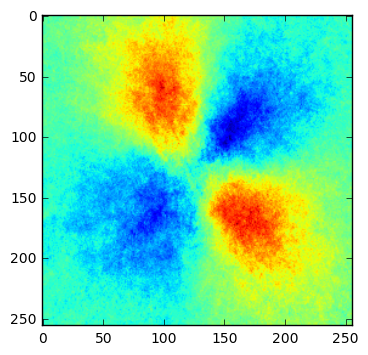

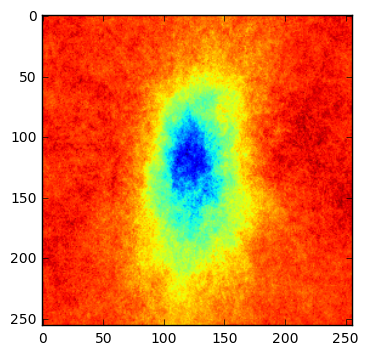

In [15]:
for x in range(0, 5):
#     i = randrange(0, n_components)
    plt.imshow(eigenfaces[x])
    plt.show()


In [16]:
from sklearn.decomposition import KernelPCA

kn_components = 300
kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=15) # very sensitive to the gamma parameter
%time kpca.fit(vector_images)

Wall time: 4.41 s


KernelPCA(alpha=1.0, coef0=1, degree=3, eigen_solver='auto',
     fit_inverse_transform=True, gamma=15, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=300,
     remove_zero_eig=False, tol=0)

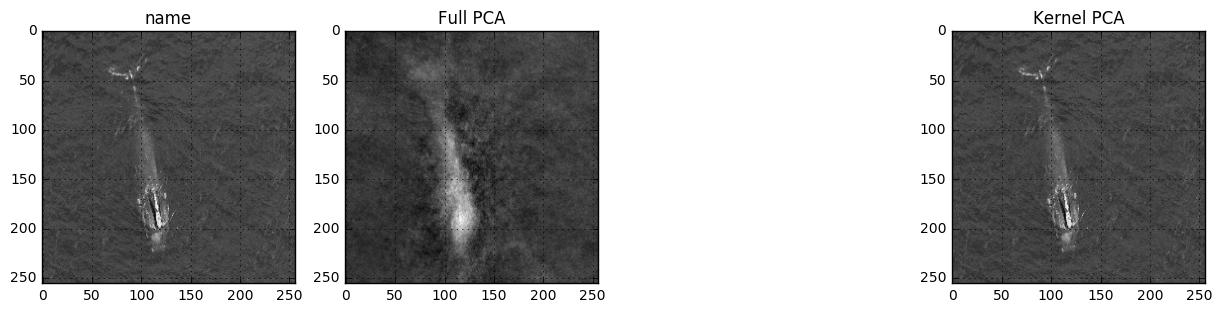

In [17]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

from ipywidgets import widgets  # make this interactive!
# compare the different methods

h = 256
w = 256

def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(vector_images[idx_to_reconstruct]))
#     reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(X[idx_to_reconstruct]))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(vector_images[idx_to_reconstruct]))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(vector_images[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)
#     plt.title(names[y[idx_to_reconstruct]])
    plt.title("name")
    plt.grid()
    
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid()
    
#     plt.subplot(1,4,3)
#     plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
#     plt.title('Randomized PCA')
#     plt.grid()
    
    plt.subplot(1,4,4)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid()
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,num_images-1,1),__manual=True)

### Feature Extraction